#### Multi class image classification

**In this we will see 10 food classes for classification.**

1. Load data
2. Pre process data
3. create Model
4. fit model (overfit model to make sure it works)
5. Evaluate model
6. Adjust different  hyper parameters
7. Repeat



In [32]:
import tensorflow as tf
tf.random.set_seed(42)

#### Import data 

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-05-31 10:06:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   245MB/s    in 2.0s    

2021-05-31 10:06:27 (245 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 10 directories and 0 images in 10_fo

In [4]:
# set up directories
train_dir="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

#### Visualize data

In [5]:
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_img(target_dir,target_class):
  pathtoimg=pathlib.Path(os.path.join(target_dir,target_class))
  files=[item.name for item in pathtoimg.glob("*")]
  random_idx=random.randint(0,len(files))
  img=mpimg.imread(os.path.join(target_dir,target_class)+"/"+files[random_idx])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  return img

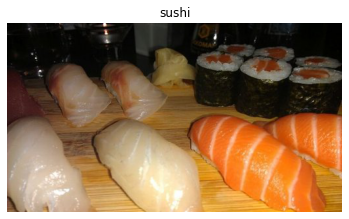

In [7]:
import random
img_random=view_random_img(target_dir=train_dir,target_class=random.choice(class_names))

In [8]:
img_random.shape

(289, 512, 3)

#### Pre-process data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
#Rescale data
train_datagen=ImageDataGenerator(rescale=1/255.0)
test_datagen=ImageDataGenerator(rescale=1/255.0)

#load data in batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### Create baseline model

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras import Sequential


In [12]:
model_1=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),

                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),

                    Flatten(),
                    Dense(10,activation="softmax")# multiclass classification
])

#compile
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])



In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [14]:
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 75s 183ms/step - loss: 2.1853 - accuracy: 0.1937 - val_loss: 2.0055 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8876 - accuracy: 0.3425 - val_loss: 1.9376 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.5017 - accuracy: 0.4957 - val_loss: 2.0731 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 0.8783 - accuracy: 0.7084 - val_loss: 2.4615 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 0.3249 - accuracy: 0.8997 - val_loss: 3.6548 - val_accuracy: 0.2792


#### Evaluate model

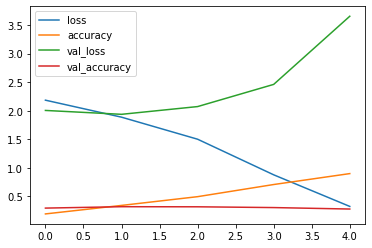

In [15]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [16]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.6548 - accuracy: 0.2792


[3.6547553539276123, 0.2791999876499176]



###### **Note** : from the loss and accuracy curves we can see that model is learned train data very well but failed to generalize on unseen data.Means model got overfit.
To reduce overfitting we need to adjust model hyperparameters.




##### **steps to reduce overfitting:**
1. Get more data
2. Reduce model complexity
3. Use data augmentation
4. Use transfer learning

##### `experiment 1` : Reduce complexity
Remove 2 convolution layer from model

In [17]:

model_2=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation="softmax")
])

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=5)

Epoch 1/5
235/235 [==============================] - 41s 173ms/step - loss: 2.1917 - accuracy: 0.2377 - val_loss: 1.9630 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 40s 172ms/step - loss: 1.8356 - accuracy: 0.3596 - val_loss: 1.9153 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 41s 173ms/step - loss: 1.4846 - accuracy: 0.5028 - val_loss: 1.9298 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 0.9985 - accuracy: 0.6857 - val_loss: 2.1976 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 41s 173ms/step - loss: 0.5601 - accuracy: 0.8359 - val_loss: 2.5622 - val_accuracy: 0.3088


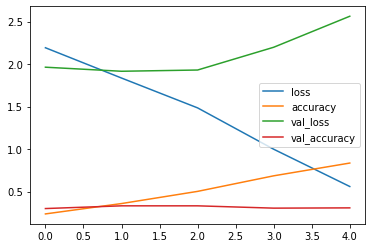

In [18]:
pd.DataFrame(history_2.history).plot()

we can see here that validation loss and training loss not following each other.Validation loss is increasing per epoch even though 
training loss is continues decreasing.Seems like model is continuing to overfit and failing to generalize.

Above experiment didn't worked out as we can see validation accuracy decreased and overfitting continued.

Let's  improve model results with data augmentation in experiment 2

##### `experiment 2`  Use data augmentation

In [38]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.0,
                                        horizontal_flip=True,
                                        
                                        rotation_range=0.2,
                                        zoom_range=0.2,
                                        brightness_range=(0,0.2)                                       )


train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical"
                                                                 
                                                                 )

Found 7500 images belonging to 10 classes.


In [29]:
model_3=tf.keras.models.clone_model(model_1)
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [30]:
#need to compile the model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),            
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 110s 468ms/step - loss: 2.2102 - accuracy: 0.1624 - val_loss: 2.5337 - val_accuracy: 0.2004
Epoch 2/5
235/235 [==============================] - 110s 469ms/step - loss: 2.1438 - accuracy: 0.2008 - val_loss: 2.4063 - val_accuracy: 0.2144
Epoch 3/5
235/235 [==============================] - 110s 469ms/step - loss: 2.1196 - accuracy: 0.2183 - val_loss: 3.5275 - val_accuracy: 0.2200
Epoch 4/5
235/235 [==============================] - 110s 468ms/step - loss: 2.0895 - accuracy: 0.2419 - val_loss: 2.8607 - val_accuracy: 0.2612
Epoch 5/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0786 - accuracy: 0.2488 - val_loss: 4.1919 - val_accuracy: 0.2272


In [31]:
model_3.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 4.1919 - accuracy: 0.2272


[4.19189977645874, 0.2272000014781952]


This time we will 
* increase number of epochs.


In [40]:
tf.random.set_seed(42)

callback=tf.keras.callbacks.EarlyStopping(patience=2,monitor="val_loss")
model_4=Sequential([
                    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),

                    Flatten(),
                    Dense(10,activation="softmax")
])

model_4.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4=model_4.fit(train_data_augmented,
            epochs=15,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data),
            )

Epoch 1/15
235/235 [==============================] - 111s 470ms/step - loss: 2.2403 - accuracy: 0.1452 - val_loss: 2.7686 - val_accuracy: 0.1824
Epoch 2/15
235/235 [==============================] - 110s 468ms/step - loss: 2.1343 - accuracy: 0.2113 - val_loss: 3.7246 - val_accuracy: 0.1660
Epoch 3/15
235/235 [==============================] - 110s 468ms/step - loss: 2.0929 - accuracy: 0.2404 - val_loss: 2.4635 - val_accuracy: 0.2480
Epoch 4/15
235/235 [==============================] - 110s 466ms/step - loss: 2.0416 - accuracy: 0.2677 - val_loss: 2.6348 - val_accuracy: 0.2696
Epoch 5/15
235/235 [==============================] - 110s 467ms/step - loss: 1.9908 - accuracy: 0.2959 - val_loss: 3.2723 - val_accuracy: 0.2800
Epoch 6/15
235/235 [==============================] - 110s 467ms/step - loss: 1.9621 - accuracy: 0.3061 - val_loss: 3.1354 - val_accuracy: 0.2968
Epoch 7/15
235/235 [==============================] - 109s 465ms/step - loss: 1.9132 - accuracy: 0.3329 - val_loss: 3.3204 -

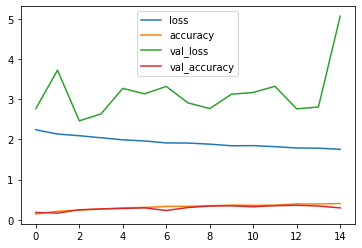

In [41]:
pd.DataFrame(history_4.history).plot()

seems like the this architecture is not really helping us in improving .

Using transfer learning we can see how we can get good accuracy.